## Assignment - Data Exploration 1

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 


Submit your work below, and plan on discussing with your mentor. You can also take a look at these [example solutions](https://github.com/Thinkful-Ed/data-201-assignment-solutions/blob/master/model_prep_data_exploration_1/solution.ipynb).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
%matplotlib inline

### Dealing with NaN values

In [2]:
PATH = r'C:\Users\latee\Downloads\states_all.csv'
US_EDU = pd.read_csv(PATH)

In [19]:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

# filling in NaN values as the mean relating to the cooresponding year
years = US_EDU["YEAR"].unique()

for col in fill_list:
    for year in years:
        US_EDU.loc[US_EDU["YEAR"] == year, col] = US_EDU.loc[US_EDU["YEAR"] == year, col].fillna(
            US_EDU[US_EDU["YEAR"] == year][col].mean())
        
# we drop the null values after interpolation
US_EDU.dropna(inplace=True)

In [20]:
US_EDU.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,416,416,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,4.160000e+02,...,416.000000,416.000000,416.000000,4.160000e+02,4.160000e+02,4.160000e+02,416.000000,416.000000,416.000000,416.000000
unique,415,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2009_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.514423,9.414834e+05,1.047713e+07,9.431232e+05,4.850565e+06,4.683441e+06,1.058376e+07,5.471180e+06,...,72149.411058,72766.521635,64109.824519,5.814716e+05,2.852706e+05,8.791954e+05,236.595643,279.536042,219.312896,263.541828
std,NaN,NaN,5.287839,1.120275e+06,1.307360e+07,1.324751e+06,6.147404e+06,6.079043e+06,1.331684e+07,6.984693e+06,...,86130.681038,85768.502493,76693.618128,6.915741e+05,3.395019e+05,1.028613e+06,9.005287,9.590737,7.574591,6.940983
min,NaN,NaN,1996.000000,4.417900e+04,6.640570e+05,4.100700e+04,0.000000e+00,2.853100e+04,6.763050e+05,3.182600e+05,...,3423.000000,2860.000000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,NaN,NaN,2003.000000,2.781248e+05,2.653361e+06,2.587165e+05,1.427756e+06,9.379062e+05,2.620022e+06,1.400728e+06,...,20464.500000,20820.000000,18513.750000,1.663668e+05,8.174950e+04,2.600492e+05,231.909072,274.398874,214.922367,259.196767
50%,NaN,NaN,2007.000000,6.639415e+05,6.053652e+06,5.352895e+05,2.964566e+06,2.364018e+06,6.180272e+06,3.167476e+06,...,50653.500000,50114.500000,41194.000000,4.055395e+05,1.861810e+05,6.282085e+05,238.289254,281.369105,220.823937,265.036858
75%,NaN,NaN,2011.000000,1.015914e+06,1.193571e+07,1.017014e+06,5.971349e+06,5.283885e+06,1.148185e+07,6.006502e+06,...,79244.000000,80883.250000,74799.750000,6.388180e+05,3.215100e+05,9.685105e+05,242.628687,286.078002,224.447725,268.198231


It appears strange that there is a 0 min for State Revenue

## Assignment - Data Exploration 1.2

Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

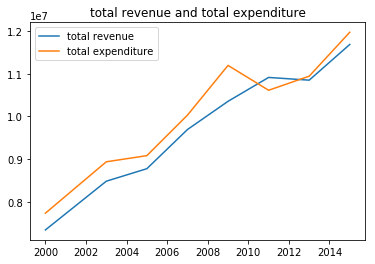

In [5]:
plt.plot(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "YEAR"],
         US_EDU.loc[US_EDU.STATE == "MINNESOTA", "TOTAL_REVENUE"], label="total revenue")

plt.plot(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "YEAR"],
         US_EDU.loc[US_EDU.STATE == "MINNESOTA", "TOTAL_EXPENDITURE"], label="total expenditure")

plt.title("total revenue and total expenditure")
plt.legend()

It appears that a sudden ressesion coupled with the fact that the budget has been running at a defecit for years crippled expenditures and revenue. 

## Assignment - Data Exploration 1.3

In your chosen state, which of the lessons are the students more successful, math or reading?

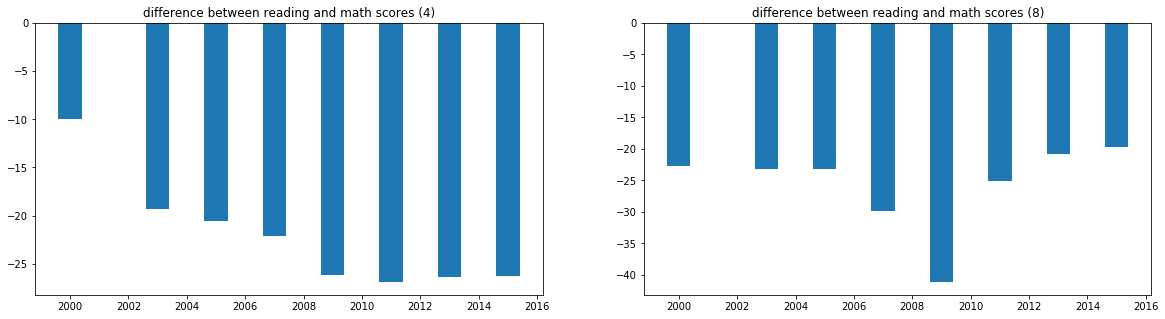

difference between reading and math scores (4)
431    -10.012373
584    -19.303333
686    -20.519613
788    -22.080758
894    -26.118872
997    -26.878014
1099   -26.390219
1201   -26.222927
dtype: float64
difference between reading and math scores (8)
431    -22.763821
584    -23.175224
686    -23.243763
788    -29.885166
894    -41.114316
997    -25.074010
1099   -20.791070
1201   -19.650210
dtype: float64


In [6]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.bar(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "YEAR"],
         US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_READING_4_SCORE"] - US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_MATH_4_SCORE"])

plt.title("difference between reading and math scores (4)")

plt.subplot(1,2,2)
plt.bar(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "YEAR"],
         US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_READING_8_SCORE"] - US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_MATH_8_SCORE"])

plt.title("difference between reading and math scores (8)")

plt.show()

print("difference between reading and math scores (4)")
print(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_READING_4_SCORE"] - US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_MATH_4_SCORE"])
print("difference between reading and math scores (8)")
print(US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_READING_8_SCORE"] - US_EDU.loc[US_EDU.STATE == "MINNESOTA", "AVG_MATH_8_SCORE"])

Students appear to be doing better at reading than math. 

## Assignment - Data Exploration 1.4

What are the distributions of the math and reading scores in the sample?

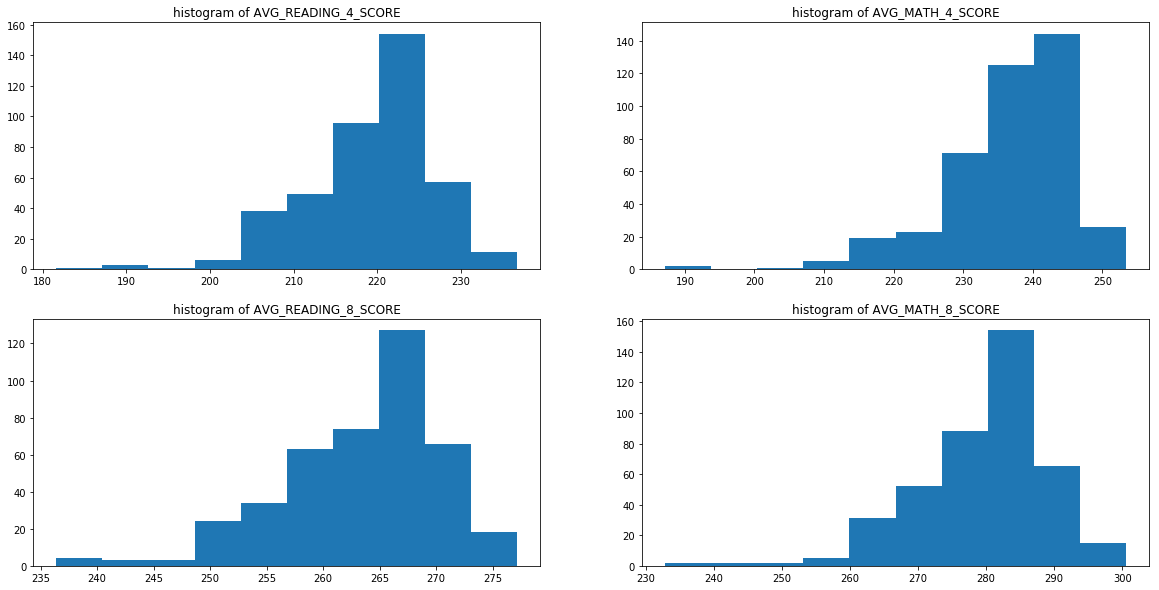

In [11]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.hist(US_EDU.AVG_READING_4_SCORE)
plt.title("histogram of {}".format("AVG_READING_4_SCORE"))

plt.subplot(2,2,2)
plt.hist(US_EDU.AVG_MATH_4_SCORE)
plt.title("histogram of {}".format("AVG_MATH_4_SCORE"))

plt.subplot(2,2,3)
plt.hist(US_EDU.AVG_READING_8_SCORE)
plt.title("histogram of {}".format("AVG_READING_8_SCORE"))

plt.subplot(2,2,4)
plt.hist(US_EDU.AVG_MATH_8_SCORE)
plt.title("histogram of {}".format("AVG_MATH_8_SCORE"))
plt.show()

Both math and reading scores are skewed towards the left. Implies that the mean is less than the median. 

## Assignment - Data Exploration 1.5

Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

We used interpolation earlier so in order to complete this operation we need to reload the data, then deal with NaN values on a case by case basis and plot it

In [12]:
US_EDU = pd.read_csv(PATH)

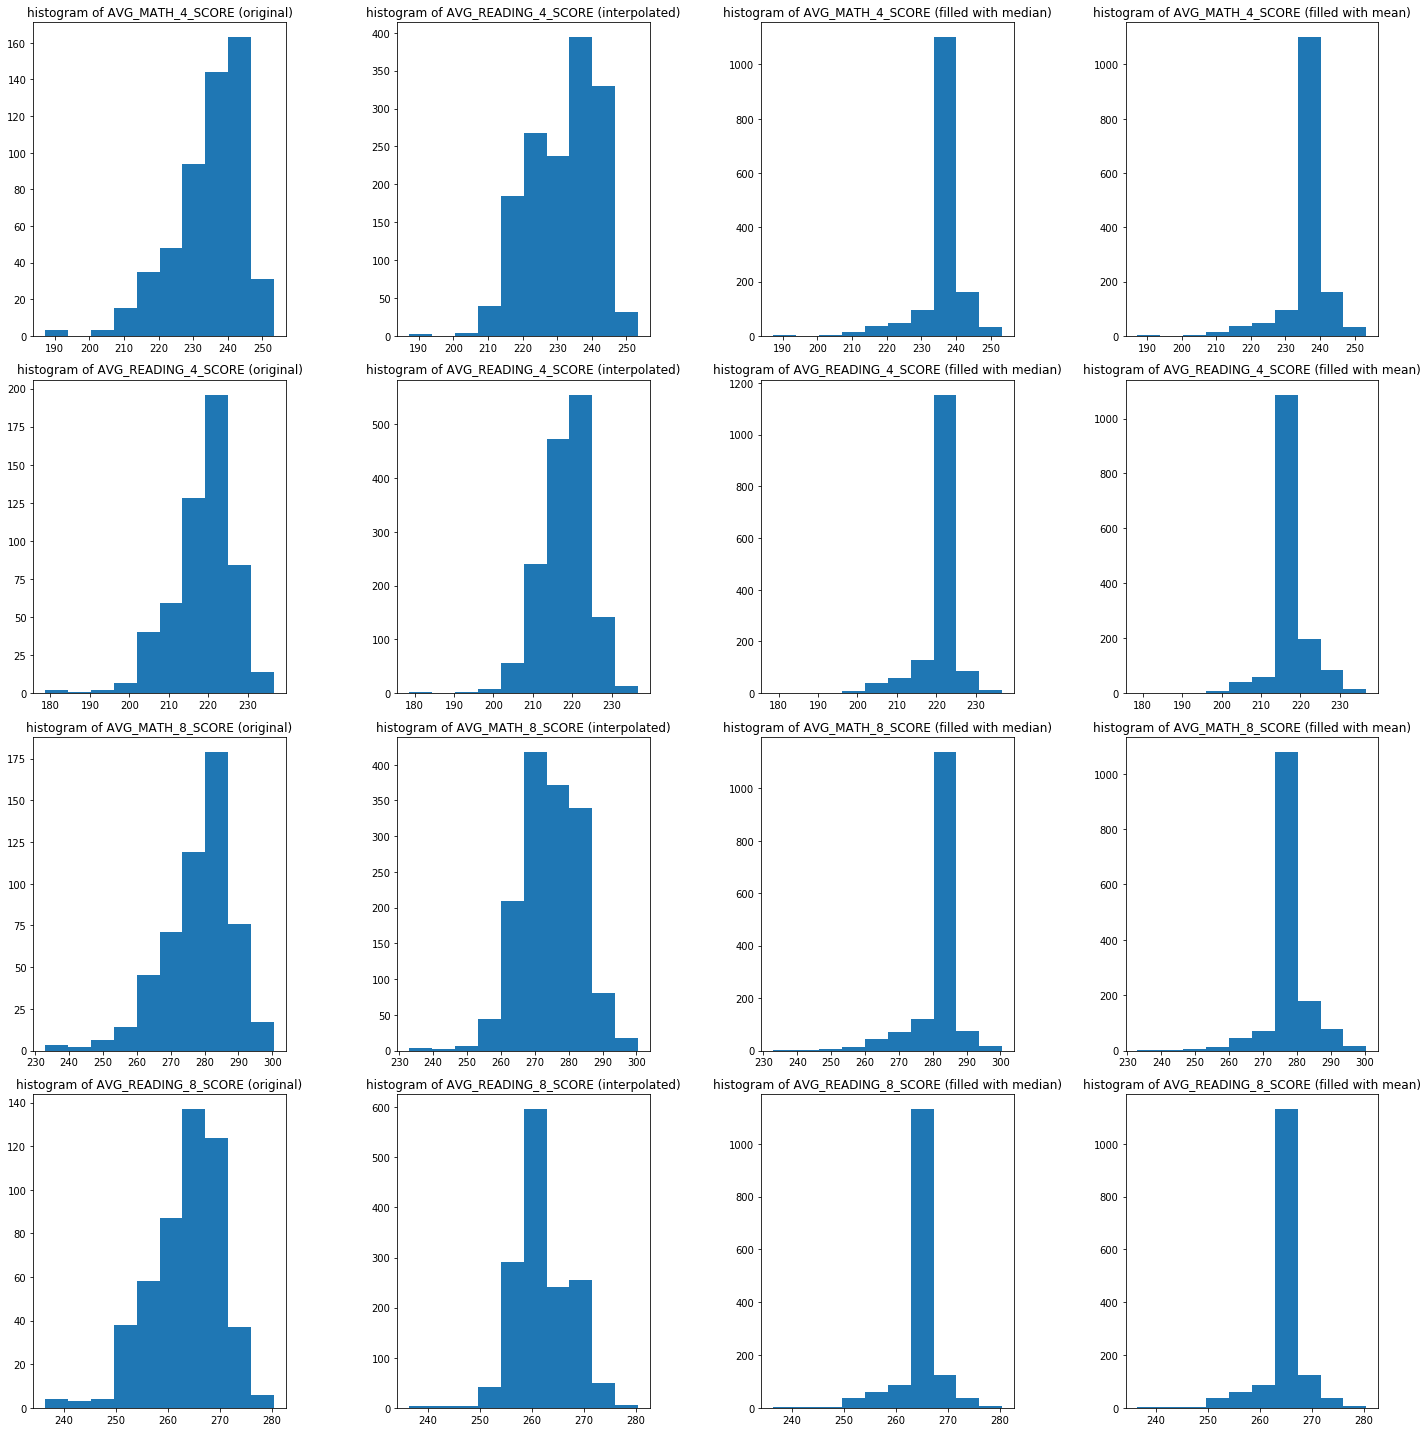

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(4,4,1)
plt.hist(US_EDU.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(US_EDU.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(US_EDU.AVG_MATH_4_SCORE.fillna(US_EDU.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(US_EDU.AVG_MATH_4_SCORE.fillna(US_EDU.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(US_EDU.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(US_EDU.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(US_EDU.AVG_READING_4_SCORE.fillna(US_EDU.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(US_EDU.AVG_READING_4_SCORE.fillna(US_EDU.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(US_EDU.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(US_EDU.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(US_EDU.AVG_MATH_8_SCORE.fillna(US_EDU.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(US_EDU.AVG_MATH_8_SCORE.fillna(US_EDU.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(US_EDU.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(US_EDU.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(US_EDU.AVG_READING_8_SCORE.fillna(US_EDU.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(US_EDU.AVG_READING_8_SCORE.fillna(US_EDU.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()
plt.show()

Interpolation here gives us the most "normal" distribution compared to the other 2 methods used to impute missing values. Each method used had a heavy impact on the shape of our data. 

Note: Unless we have significant domain "industry" knowledge to select the best methods for preparing our data for modeling, we will need to explore multiple views to understand the transformations these operations do to our data. 